In [1]:
import pandas as pd
import numpy as np
import pylab
import scipy.stats as stats
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import random
import seaborn as sns

data = pd.read_csv('C:/Users/Thinkpad/Desktop/Fall19/IE598/groupproject/MLF_GP2_EconCycle.csv')
data = data.drop(columns = ['Date','USPHCI'], axis = 1)

data.shape

(223, 15)

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.describe()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,8.030717,8.410673,8.563587,8.808655,8.979776,9.073498,7.942197,7.936906,7.892780,0.981765,0.983524,0.982666,0.007083,0.014090,0.021078
std,3.158575,2.954431,2.820405,2.647742,2.542686,2.447525,3.405098,3.329354,3.181421,0.086243,0.077222,0.067152,0.004839,0.009137,0.013037
min,3.180000,3.840000,4.170000,4.710000,5.050000,5.330000,3.110000,3.140000,3.190000,0.717523,0.713534,0.698496,-0.006811,-0.009818,-0.012272
25%,5.735000,6.180000,6.410000,6.695000,6.965000,7.175000,5.605000,5.645000,5.635000,0.933849,0.939727,0.945402,0.005526,0.010694,0.014351
50%,7.670000,8.000000,8.130000,8.330000,8.520000,8.610000,7.730000,7.720000,7.620000,0.972671,0.977941,0.979955,0.008270,0.016184,0.024425
75%,9.840000,10.075000,10.375000,10.525000,10.640000,10.685000,9.345000,9.345000,9.300000,1.033005,1.026137,1.015973,0.010203,0.019878,0.029398
max,16.720000,16.460000,16.220000,15.930000,15.650000,15.320000,18.950000,18.070000,16.660000,1.339223,1.277032,1.220480,0.020297,0.036636,0.050174


In [3]:
# Train-test split
from sklearn.model_selection import train_test_split
X = data.iloc[:,:12]
y = data.iloc[:,12:15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

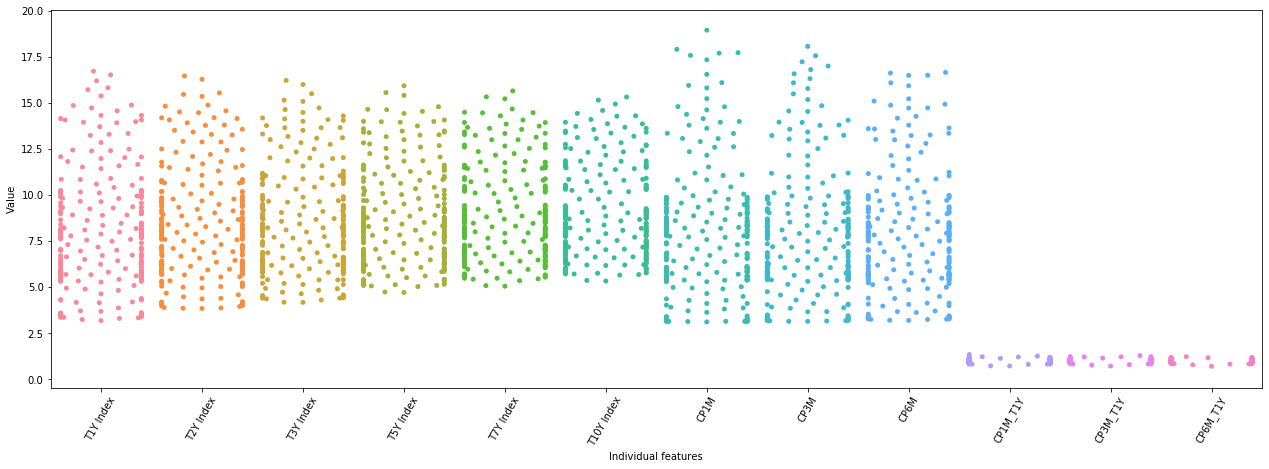

In [4]:
# Swarmplot
_ = sns.swarmplot(data = X)
_ = plt.xlabel('Individual features')
_ = plt.xticks(rotation = 60)
_ = plt.ylabel('Value')
plt.tight_layout()
plt.gcf().set_size_inches(20, 8)
plt.show()

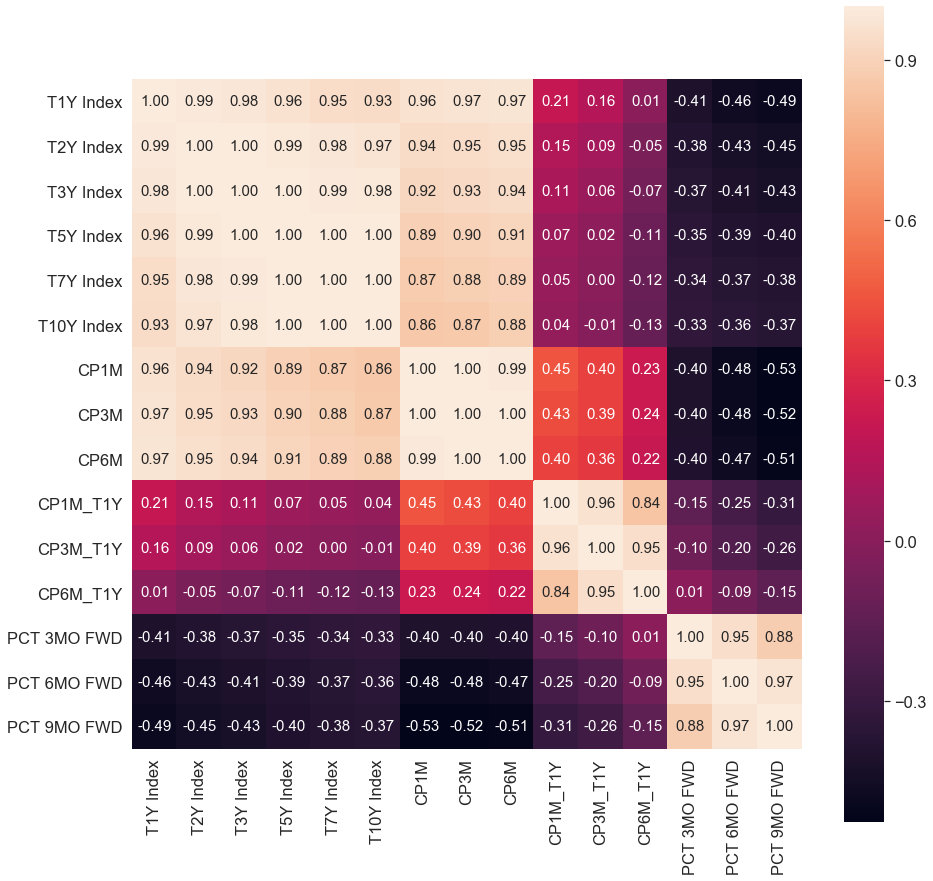

In [5]:
# Heatmap
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=data.columns, xticklabels=data.columns)
plt.gcf().set_size_inches(15, 15)
plt.show()

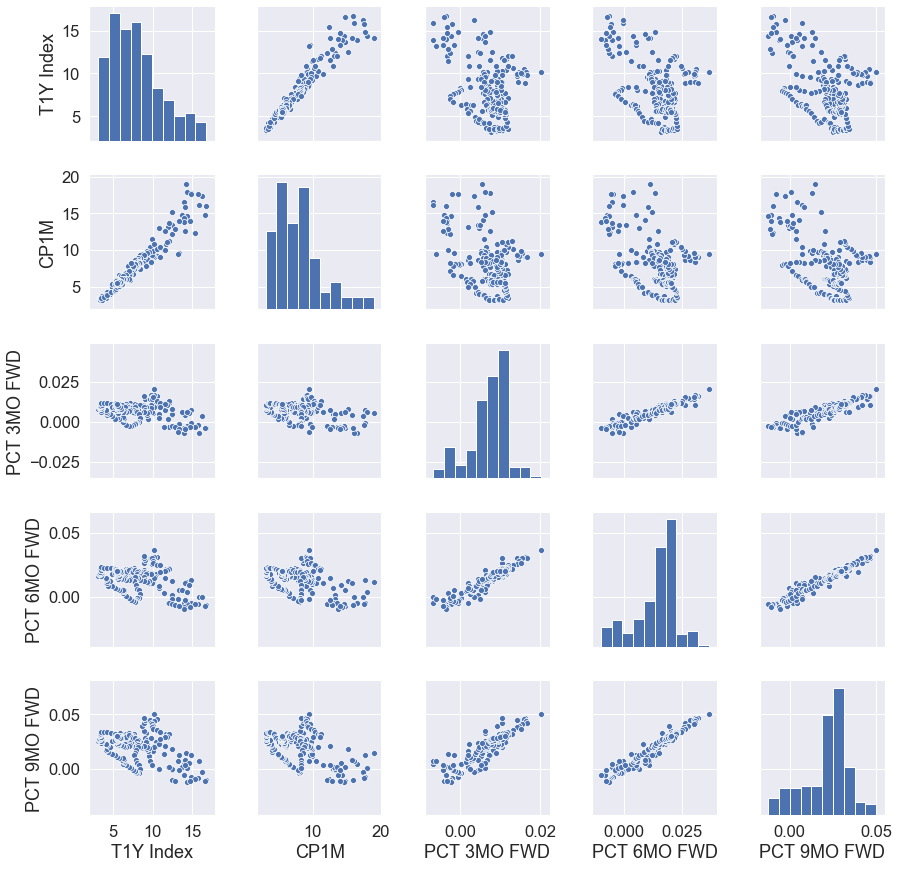

In [6]:
# Pairplot
select_data = pd.concat([X.iloc[:,0],X.iloc[:,6],y],axis = 1)
sns.pairplot(select_data)
plt.show()

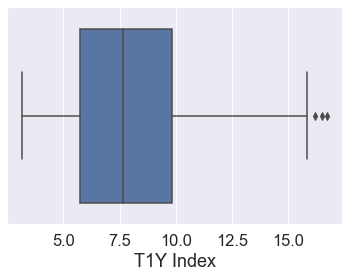

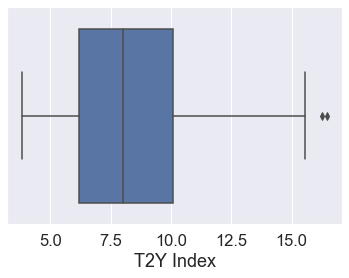

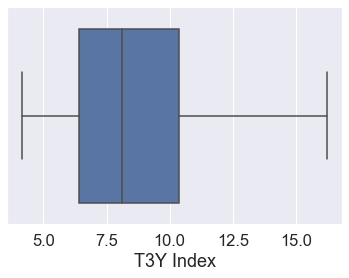

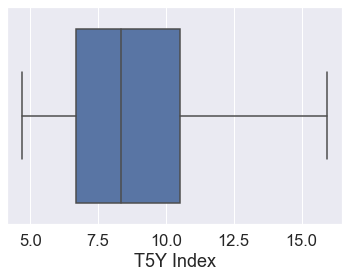

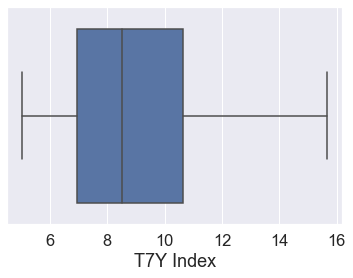

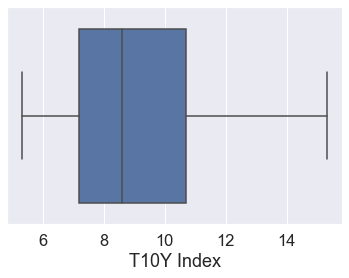

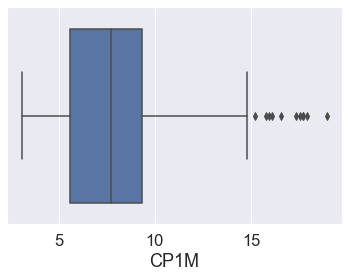

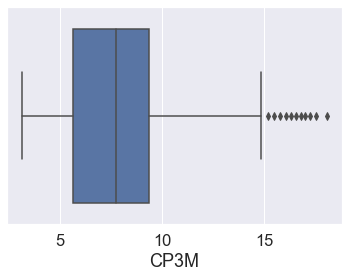

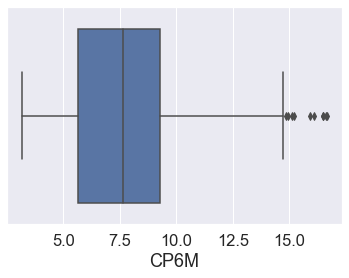

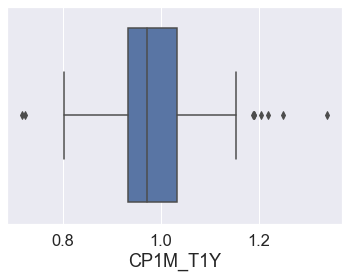

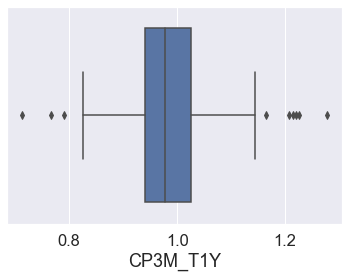

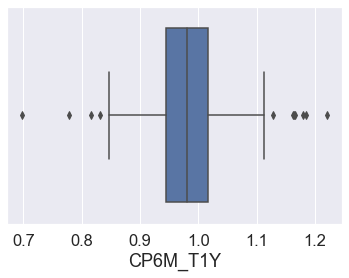

In [7]:
#boxplot
for i in range(X.shape[1]):
    sns.boxplot(X.iloc[:,i])
    plt.show()

In [8]:
# Normalization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

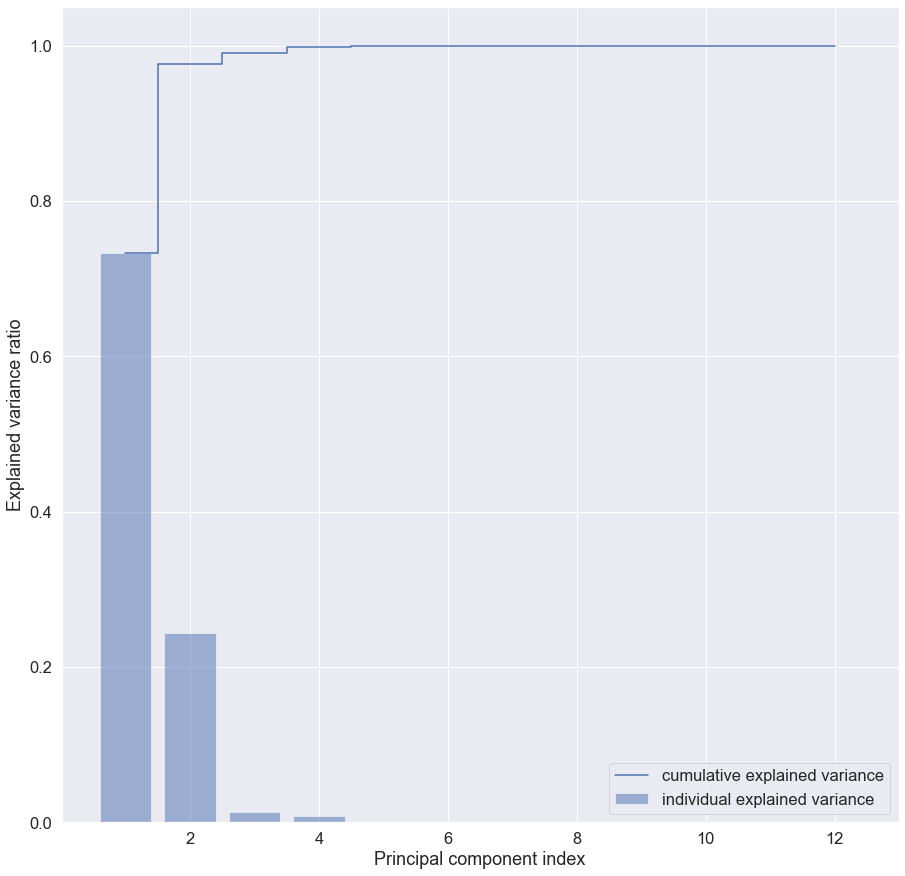


Cumulative explained variance of the all component PCA 
[0.73340155 0.97708721 0.99024384 0.99863322 0.99939369 0.99974718
 0.99987784 0.9999555  0.99997925 0.99999143 0.99999834 1.        ]


In [9]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1,13), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,13), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.gcf().set_size_inches(15, 15)
plt.show()
print('\nCumulative explained variance of the all component PCA \n%s' % cum_var_exp)

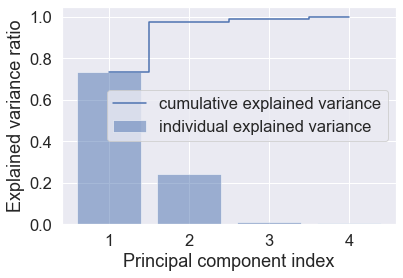


Cumulative explained variance of the 4 component PCA 
[0.73340155 0.97708721 0.99024384 0.99863322]


In [10]:
# PCA with 4 components
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1,5), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,5), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()
print('\nCumulative explained variance of the 4 component PCA \n%s' % cum_var_exp)

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso()
for i in range(3):
    lasso.fit(X_train_pca,y_train.iloc[:,i])
    y_pred=lasso.predict(X_test_pca)
    print("R^2 of",y_train.columns[i],": {}".format(lasso.score(X_test_pca, y_test.iloc[:,i])))
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:,i],y_pred))
    print("Root Mean Squared Error",y_train.columns[i],": {}".format(rmse))

R^2 of PCT 3MO FWD : -0.0066591289136592735
Root Mean Squared Error PCT 3MO FWD : 0.004492434956315657
R^2 of PCT 6MO FWD : -0.013071634381851105
Root Mean Squared Error PCT 6MO FWD : 0.008265143699055377
R^2 of PCT 9MO FWD : -0.012755465593273119
Root Mean Squared Error PCT 9MO FWD : 0.011649929010788582


In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge()
for i in range(3):
    ridge.fit(X_train_pca,y_train.iloc[:,i])
    y_pred=ridge.predict(X_test_pca)
    print("R^2 of",y_train.columns[i],": {}".format(ridge.score(X_test_pca, y_test.iloc[:,i])))
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:,i],y_pred))
    print("Root Mean Squared Error",y_train.columns[i],": {}".format(rmse))

R^2 of PCT 3MO FWD : 0.11102731611011674
Root Mean Squared Error PCT 3MO FWD : 0.004221674914598748
R^2 of PCT 6MO FWD : 0.1427409476032283
Root Mean Squared Error PCT 6MO FWD : 0.007603024165888384
R^2 of PCT 9MO FWD : 0.24946515666358562
Root Mean Squared Error PCT 9MO FWD : 0.01002897181232682


In [24]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
for i in range(3):
    dt.fit(X_train_pca,y_train.iloc[:,i])
    y_pred=dt.predict(X_test_pca)
    print("R^2 of",y_train.columns[i],": {}".format(dt.score(X_test_pca, y_test.iloc[:,i])))
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:,i],y_pred))
    print("Root Mean Squared Error",y_train.columns[i],": {}".format(rmse))

R^2 of PCT 3MO FWD : -0.6116400382195275
Root Mean Squared Error PCT 3MO FWD : 0.005684268760216031
R^2 of PCT 6MO FWD : 0.10724873376897026
Root Mean Squared Error PCT 6MO FWD : 0.00775881806646106
R^2 of PCT 9MO FWD : 0.13766030392064665
Root Mean Squared Error PCT 9MO FWD : 0.010750042231515378


In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
for i in range(3):
    knn.fit(X_train_pca,y_train.iloc[:,i])
    y_pred=knn.predict(X_test_pca)
    print("R^2 of",y_train.columns[i],": {}".format(knn.score(X_test_pca, y_test.iloc[:,i])))
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:,i],y_pred))
    print("Root Mean Squared Error",y_train.columns[i],": {}".format(rmse))

R^2 of PCT 3MO FWD : 0.2029079719230208
Root Mean Squared Error PCT 3MO FWD : 0.003997558358952546
R^2 of PCT 6MO FWD : 0.34114661536153695
Root Mean Squared Error PCT 6MO FWD : 0.006665377047143946
R^2 of PCT 9MO FWD : 0.4351865771119301
Root Mean Squared Error PCT 9MO FWD : 0.008700084801300873


In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50),'weights':['uniform','distance'],'algorithm':['ball_tree','kd_tree','brute','auto']}
for i in range(3):
    knn_cv = GridSearchCV(knn,param_grid,cv=10)
    knn_cv.fit(X_train_pca,y_train.iloc[:,i])
    print ('The best n_neighbors of ',y_train.columns[i],' is ',knn_cv.best_params_)
    print ('The best score of ',y_train.columns[i],'is ',knn_cv.best_score_)
    # Extract best model from 'grid_dt'
    best_model = knn_cv.best_estimator_
    # Evaluate test set accuracy
    test_acc = best_model.score(X_test_pca,y_test.iloc[:,i])
    # Print test set accuracy
    print('Test set accuracy of best model of ',y_train.columns[i],' is ',test_acc,'\n')

C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best n_neighbors of  PCT 3MO FWD  is  {'algorithm': 'brute', 'n_neighbors': 4, 'weights': 'distance'}
The best score of  PCT 3MO FWD is  0.3919274043350709
Test set accuracy of best model of  PCT 3MO FWD  is  0.28957365003058644 



C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best n_neighbors of  PCT 6MO FWD  is  {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
The best score of  PCT 6MO FWD is  0.5149039201052886
Test set accuracy of best model of  PCT 6MO FWD  is  0.43394298523455166 

The best n_neighbors of  PCT 9MO FWD  is  {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
The best score of  PCT 9MO FWD is  0.5350418180320315
Test set accuracy of best model of  PCT 9MO FWD  is  0.5619624246843937 



C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid

rfr = RandomForestRegressor()
grid = {'n_estimators':[200,300,400],'max_depth':[3,5,7]}

test_score = []

for i in range(y_train.shape[1]):
    score = []
    for g in ParameterGrid(grid):
        rfr.set_params(**g)
        rfr.fit(X_train_pca,y_train.iloc[:,i])
        rfr_in_sample_accuracy = rfr.score(X_train_pca,y_train.iloc[:,i])
        rfr_out_sample_accuracy = rfr.score(X_test_pca,y_test.iloc[:,i])
#         print ('The current parameters are: ',g)
#         print ('The in sample accuracies are ', rfr_in_sample_accuracy)
#         print ('The out sample accurarcies are ', rfr_out_sample_accuracy)
        score.append(rfr_out_sample_accuracy)
    best_idx = np.argmax(score)
    print ('The best parameters are ',ParameterGrid(grid)[best_idx])
    print ('The best score of ',y_train.columns[i], ' is ', score[best_idx],'\n')

The best parameters are  {'n_estimators': 400, 'max_depth': 7}
The best score of  PCT 3MO FWD  is  0.2988313087176719 

The best parameters are  {'n_estimators': 300, 'max_depth': 7}
The best score of  PCT 6MO FWD  is  0.4245628971436302 

The best parameters are  {'n_estimators': 200, 'max_depth': 7}
The best score of  PCT 9MO FWD  is  0.5136546882126234 

